> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Project: An investigation into a TMDB dataset¶


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> > I select the TMDb movie dataset for analysis. The TMDb  dataset contains  about 10,000 movie data collected from The TMDb website. 

> Contain:
Total Rows = 10866
Total Columns = 21

>Questions
Which year has the highest release of movies?
Which Movie Has The Highest Or Lowest Profit?
Movie with Highest And Lowest Budget?
Which movie made the highest revenue and lowest as well?
Which Year Has The Highest Profit Rate?
Average Runtime Of Movies From Year To Year?
Which Genre Has The Highest Release Of Movies?
Most Frequent star cast?

In [2]:
# Use this cell to set up import statements for all of the packages that you plan to use.

import pandas as pd
import numpy as np
import seaborn as sns
import csv
import pprint
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movies_data = pd.read_csv('tmdb-movies.csv')
movies_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movies_data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
movies_data = pd.read_csv('tmdb-movies.csv')
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> The following column will be removed: id, vote_count, cast, tagline, overview, production_company, keywords, and homepage.
Removing the duplicacy in the rows.

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
deleted_col=[ 'imdb_id', 'vote_count', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'tagline', 'production_companies', 'vote_average']
#deleting the columns
movies_data= movies_data.drop(deleted_col,1)

#previewing the new dataset
movies_data.head(1)


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015


In [7]:
#Removing the duplicacy in the rows
movies_data.drop_duplicates(keep ='first', inplace=True)
rows, col = movies_data.shape

movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 1018.6+ KB


In [8]:
#Removing zeros from budget and the revenue columns
# creating a seperate list of revenue and budget column
zero_list=['budget', 'revenue','runtime']

#this will replace all the value from '0' to NAN in the list
movies_data[zero_list] = movies_data[zero_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
movies_data.dropna(subset = zero_list, inplace = True)

movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
id                3854 non-null int64
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
runtime           3854 non-null float64
genres            3854 non-null object
release_date      3854 non-null object
release_year      3854 non-null int64
dtypes: float64(4), int64(2), object(5)
memory usage: 361.3+ KB


In [9]:
#Convert the release date format into standard  format
movies_data.release_date = pd.to_datetime(movies_data['release_date'])
movies_data.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1:Movies which had highest and lowest (profit, budget, revenue and runtime)

In [10]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)

profit=movies_data['revenue']-movies_data['budget']
movies_data.insert(2,'movie_profit',profit)

In [11]:
#previewing the changes in the dataset
movies_data.head(2)

,id,popularity,movie_profit,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,76341,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [12]:
#defining the high_low function
def high_low(profit):
    #for highest earned profit
    high= movies_data[profit].idxmax()
    high_details=pd.DataFrame(movies_data.loc[high])
    
    #for lowest earned profit
    low= movies_data[profit].idxmin()
    low_details=pd.DataFrame(movies_data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info


In [13]:
#Movies which had highest and lowest profit
high_low('movie_profit')


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
movie_profit,2.54451e+09,-4.13912e+08
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


Avatar earned the highest profit of 2.78151e+09.

Whereas The Warrior's Way earned the lowest profit of 1.10876e+07

In [14]:
#Movies which had highest and lowest budget
high_low('budget')


,2244,2618
id,46528,39964
popularity,0.25054,0.090186
movie_profit,-4.13912e+08,99
budget,4.25e+08,1
revenue,1.10876e+07,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


lost&found is the lowest budget of 1$.

Whereas The Warrior's Way is the highest budget of 1.10876e+07

In [15]:
#Movies which had highest and lowest revenue
high_low('revenue')

,1386,5067
id,19995,13537
popularity,9.43277,0.462609
movie_profit,2.54451e+09,-6e+06
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History


Shattered Glass is the lowest revenue of 2$.

Whereas  Avatar is the highest revenue of 2.78151e+09

In [16]:
#Movies which had highest and lowest runtime
high_low('runtime')

,2107,5162
id,43434,24914
popularity,0.534192,0.208637
movie_profit,-1.71287e+07,-5
budget,1.8e+07,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation


Carlos is the highest runtime of 338 min.

Whereas  Kid's Story is the lowest runtime of 15 min

### Research Question 2: Profit vs Year 

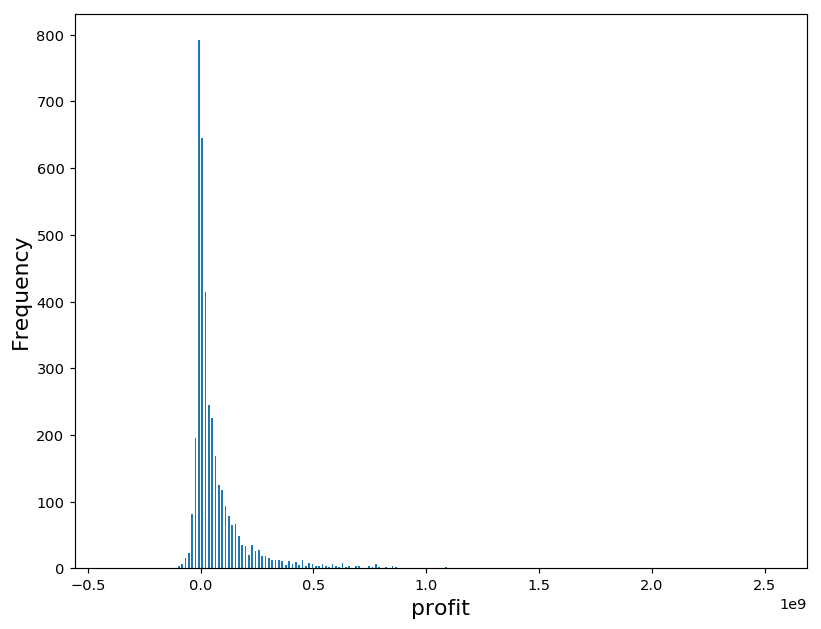

In [17]:
plt.figure(figsize=(9,7), dpi = 105)
plt.xlabel('profit', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.hist(movies_data['movie_profit'], rwidth = 0.5, bins =200);


count    3.854000e+03
mean     7.048292e+07
std      1.506195e+08
min     -4.139124e+08
25%     -1.321535e+06
50%      2.002019e+07
75%      8.170331e+07
max      2.544506e+09
Name: movie_profit, dtype: float64

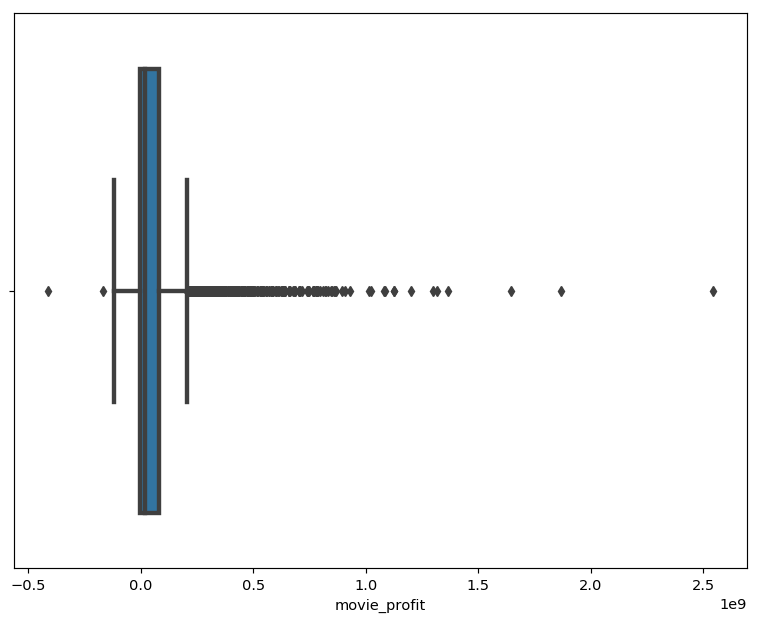

In [18]:
plt.figure(figsize=(9,7), dpi = 105)
sns.boxplot(movies_data['movie_profit'], linewidth = 3);
movies_data['movie_profit'].describe()


Using the previous figures the following points can be conclude:
The average profit of the movies is 7.048292e+07 and
50% of movies have a profit of 2.002019e+07 $, and  
75% of movies have a profit of 8.170331e+07 $.


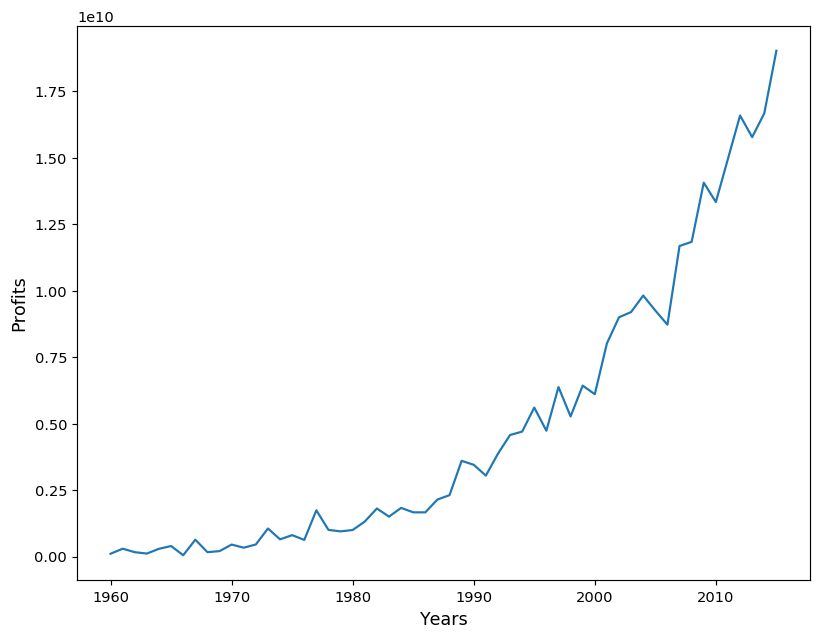

In [19]:
plt.figure(figsize=(9,7), dpi = 105)
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Profits', fontsize = 12)
plt.plot(movies_data.groupby('release_year')['movie_profit'].sum());

In [24]:
#Average profit
movies_data['movie_profit'].mean()

70482919.14322782

In [25]:
#Average budget
movies_data['budget'].mean()

37203696.954852104

In [26]:
#Average revenue
movies_data['revenue'].mean()

107686616.09807992

In [108]:
#Average runtime
movies_data['runtime'].mean()

109.22029060716139

According to the graphical and calculation results the year 2015 was the year where movies earned the highest profit.
It found also that the average profit, budget and revenue are 70482919, 37203696, and 107686616, respectively.

### Research Question 3:  Which genres and cast are most frequent 
#Some of the rows in the genres and cast column hold a multiple values. So, I need to
know how many unique genres and cast there are; and split them out.

In [92]:
def genres_cast(column):
    #separate each column by '|'
    genres_cast = movies_data[column].str.cat(sep = '|')
    
    #storing and arranging each value separately
    genres_cast = pd.Series(genres_cast.split('|'))  
    Total = genres_cast.value_counts(ascending = False)
    return Total


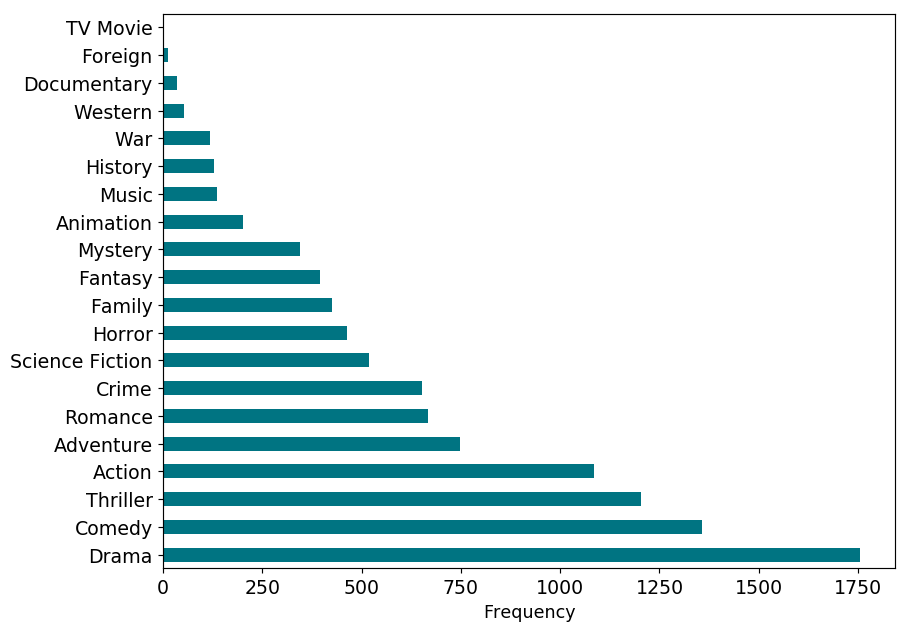

In [93]:
#Which genres are most popular
plt.figure(figsize=(9,7), dpi = 105)
plt.xlabel('Frequency', fontsize = 12)
genres_cast('genres').plot.barh(color = '#007482', fontsize = 13);

In [109]:
#Which casts are most popular
count = genres_cast('cast')
#printing top 5 values
count.head(5)

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

The previous calculation shows that Robert De Niro is on the top with total 52 cast followed by Bruce Willis with 46 and Samuel L. Jackson with 44.

<a id='conclusions'></a>
## Conclusions

To conclude:
The most profitable movie is Avatar with 2.78151e+09 $.
The average profit of the movies is 7.048292e+07 with half of movies have a profit of 2.002019e+07 $, and 75% of movies have a profit of 8.170331e+07 $.

The highest budget movie is Warrior's Way with 1.10876e+07 $.

Average Budget is around 37203696 dollar
Average duration of the movie must be 109 minutes
The most frequnt Genre movies are : Drama, Comedy, Thriller and Action.
Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage and Matt Damon are the most actors act with a total of 52,46,44,43,anf 36, repectively. 